# Google Stock Market from 2010 to 2024

In [11]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [12]:
df = pd.read_csv('Google_1.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3589 non-null   object 
 1   Open       3589 non-null   float64
 2   High       3589 non-null   float64
 3   Low        3589 non-null   float64
 4   Close      3589 non-null   float64
 5   Adj Close  3589 non-null   float64
 6   Volume     3589 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 196.4+ KB


In [15]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [31]:
# Store the 'Date' column into dataframe 'djia_df'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Attach your own 'Data' index to the dataframe
df.index = df['Date']

# Drop the 'Date' column from the dataframe
df.drop('Date', axis = 1, inplace = True)

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


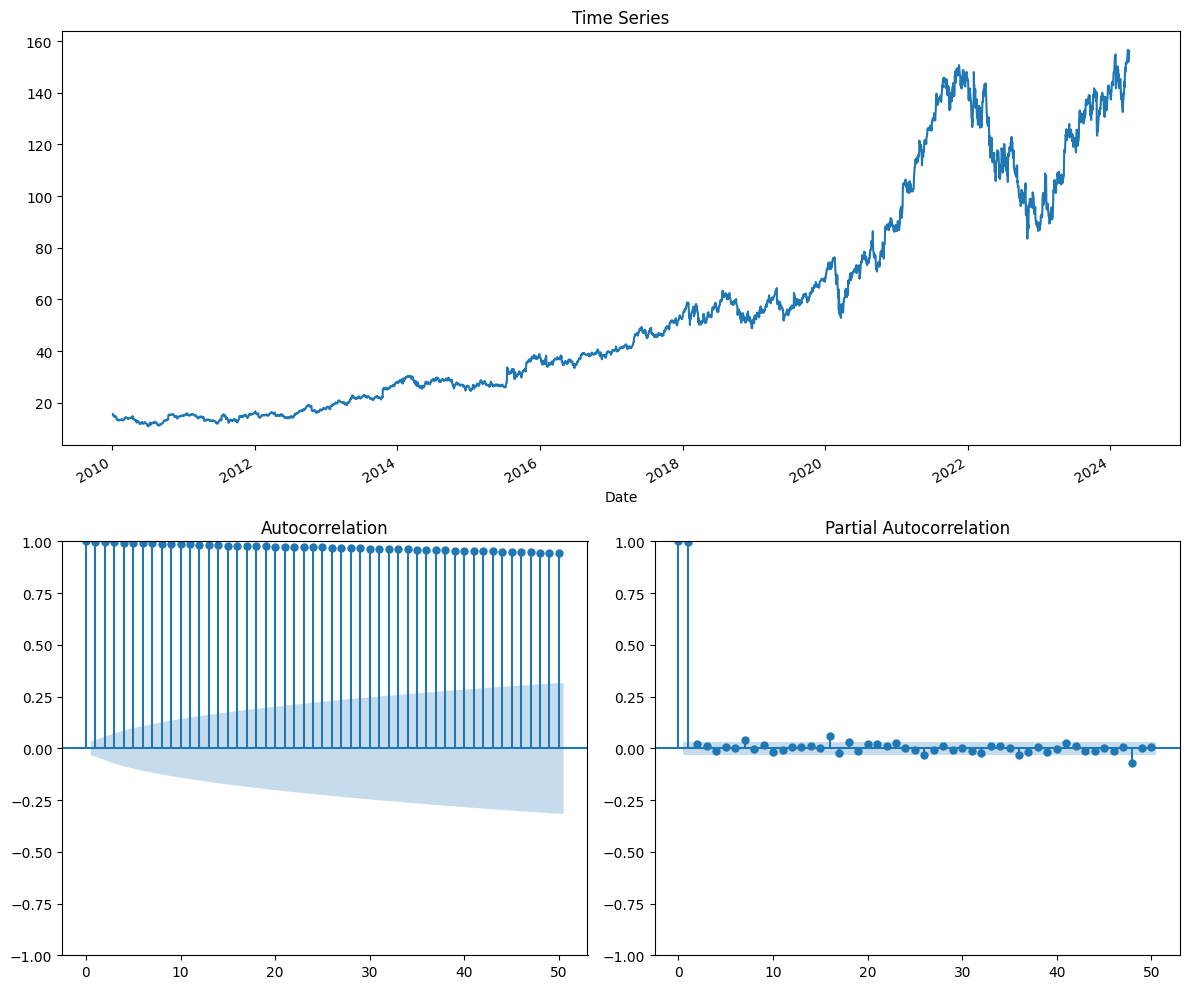

In [35]:
# Display plot of close column and Date index
plotds(df['Close'], nlag = 100)

In [37]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result = adfuller(df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 1.158234
p-value: 0.995684


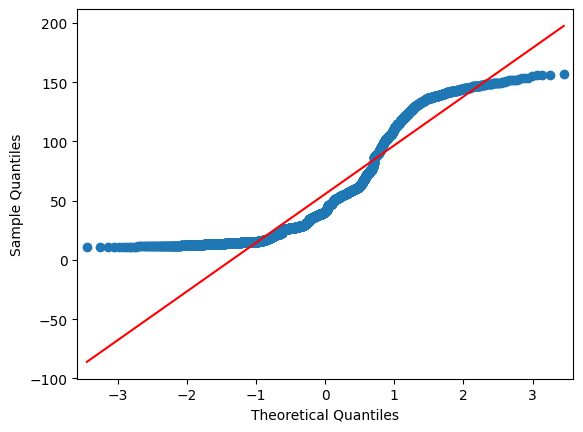

In [39]:
# qqplot for the 'Close' column
x = sm.qqplot(df['Close'], line = 's')

# ARIMA

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(df['Close'], order = (1, 1, 0))

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

C:\Users\samue\anaconda3_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Store one difference value of the 'Close' column
first_order_diff = df['Close'].diff(1)

# Display the first five records
first_order_diff.head()

Date
2010-01-04         NaN
2010-01-05   -0.068742
2010-01-06   -0.391782
2010-01-07   -0.352678
2010-01-08    0.197261
Name: Close, dtype: float64

In [48]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2010-01-05   -0.068742
2010-01-06   -0.391782
2010-01-07   -0.352678
2010-01-08    0.197261
2010-01-11   -0.022665
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2010-Dec 2024')

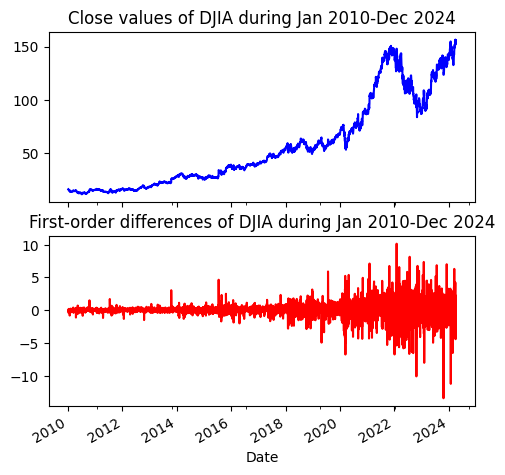

In [52]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Jan 2010-Dec 2024')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of DJIA during Jan 2010-Dec 2024')

ADF Statistic: -11.639775
p-value: 0.000000


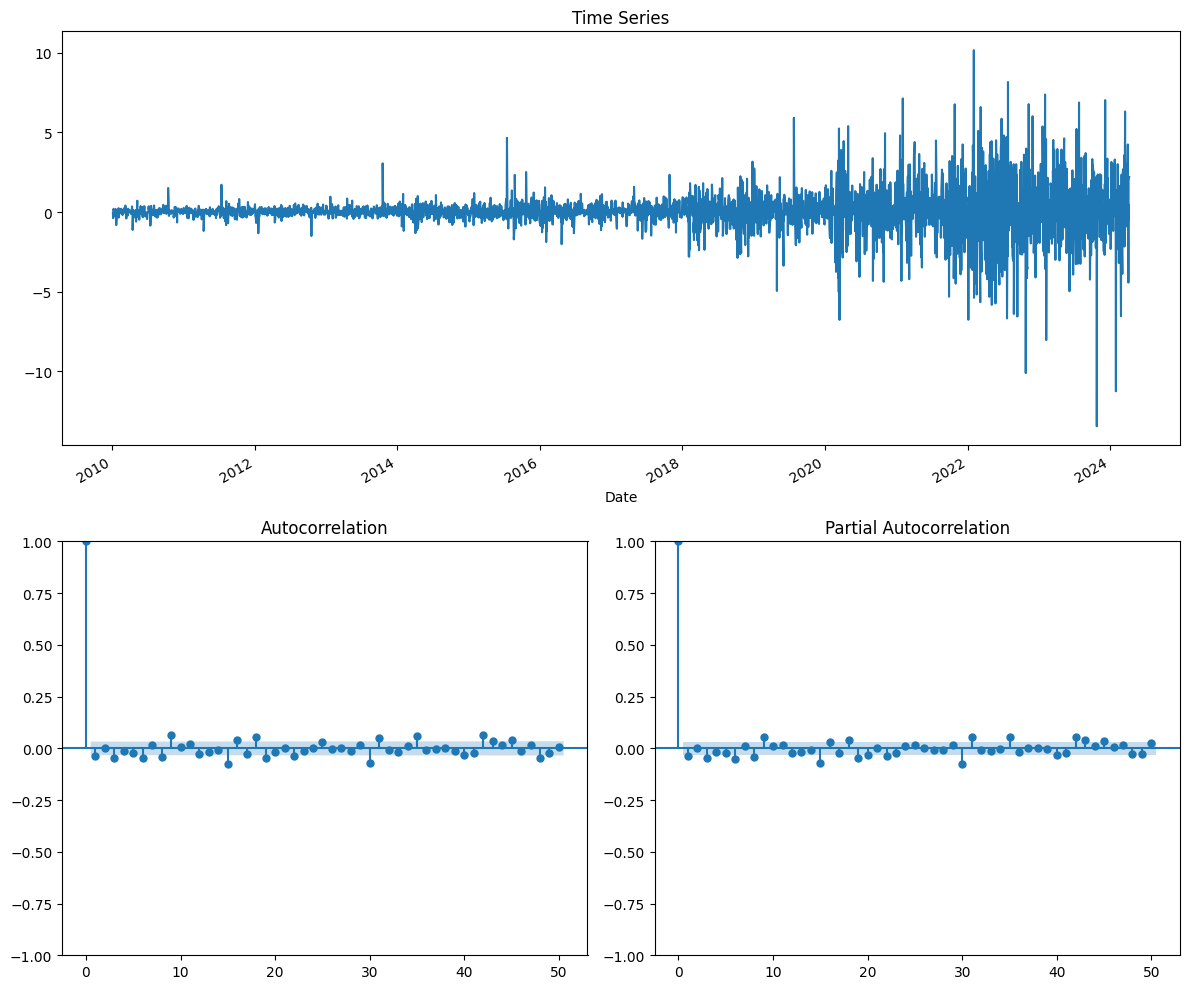

In [54]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [58]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

C:\Users\samue\anaconda3_1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samue\anaconda3_1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[[0, 1, 0, 11947.623931532102], [0, 1, 1, 11945.365159194731], [0, 1, 2, 11947.355952240552], [1, 1, 0, 11945.369353516622], [1, 1, 1, 11946.421005245822], [1, 1, 2, 11940.672227256822], [2, 1, 0, 11947.368182925062], [2, 1, 1, 11949.369123859524], [2, 1, 2, 11940.995159102546], [0, 2, 0, 14551.552691810957], [0, 2, 1, 11952.091343946087], [0, 2, 2, 11949.620551552416], [1, 2, 0, 13434.889122054505], [1, 2, 1, 11949.632764072834], [1, 2, 2, 11950.561726674336], [2, 2, 0, 13077.611964262709], [2, 2, 1, 11951.632507483893], [2, 2, 2, 11950.350857829606]]


In [60]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df['Close'].tolist(), order = (0, 2, 1))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3589
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -5974.046
Date:                Mon, 22 Apr 2024   AIC                          11952.091
Time:                        19:14:32   BIC                          11964.461
Sample:                             0   HQIC                         11956.501
                               - 3589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.001  -1056.362      0.000      -1.001      -0.998
sigma2         1.6342      0.014    116.191      0.000       1.607       1.662
===================================================================================
Ljung-Box (L1) (Q):                   4.61   Jarque-Bera (JB):             28406.51
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              55.84   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.
BIC: Bayesian Information Criterion: Similar to the AIC, but with a larger penalty term for the number of parameters in the model.
Hannan–Quinn information criterion (HQC) is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [67]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
df['diffval'] = diffval

# Display first five records
df.head()

,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
Date,,,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293,0.000000,15.610239
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494,23.415359,15.541497
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526,15.472781,15.149715
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695,14.919466,14.797037
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313,14.525978,14.994298


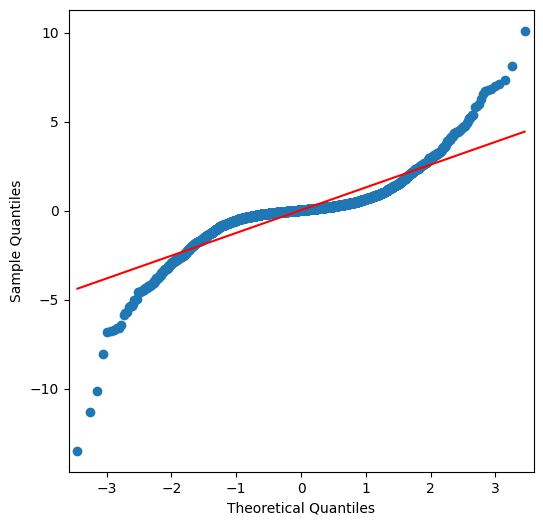

In [69]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
fig, ax = plt.subplots(figsize=(6, 6))

# Remove the first and last point from residuals
residuals = arima_obj_fit.resid[2:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [71]:
print(df['diffval'], df['ARIMA'])

Date
2010-01-04     15.610239
2010-01-05     15.541497
2010-01-06     15.149715
2010-01-07     14.797037
2010-01-08     14.994298
                 ...    
2024-04-02    155.869995
2024-04-03    156.369995
2024-04-04    151.940002
2024-04-05    153.940002
2024-04-08    156.139999
Name: diffval, Length: 3589, dtype: float64 Date
2010-01-04      0.000000
2010-01-05     23.415359
2010-01-06     15.472781
2010-01-07     14.919466
2010-01-08     14.525978
                 ...    
2024-04-02    156.549942
2024-04-03    155.919587
2024-04-04    156.419819
2024-04-05    151.987522
2024-04-08    153.988526
Name: ARIMA, Length: 3589, dtype: float64


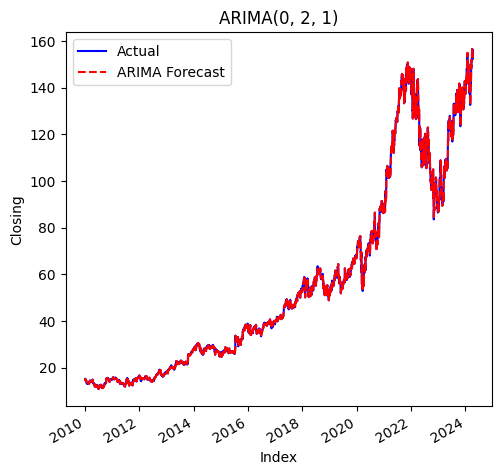

In [73]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
df['diffval'].iloc[2:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
df['ARIMA'].iloc[2:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(0, 2, 1)')
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  # Add legend

plt.show()

In [75]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 156.190 between 154.551 and 157.828
90.0% Confidence Interval: 156.190 between 154.087 and 158.292
95.0% Confidence Interval: 156.190 between 153.684 and 158.695
99.0% Confidence Interval: 156.190 between 152.897 and 159.482


C:\Users\samue\AppData\Local\Temp\ipykernel_5668\3337534286.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))
